# Divergencia

Divergencia je skalárna veličina, ktorá popisuje žriedlovosť vektorového pola, t.j. či do zvoleného bodu pole vteká (sinks) alebo z neho vyteká (source).

Divergencia vektorového poľa $\mathbf{F}$ definujeme ako

\begin{equation}
div \,  \mathbf{F} = \nabla . \mathbf{F} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}
\end{equation}

## Divergencia v cylindrických súradniciach

\begin{equation*}
\operatorname{div} \mathbf F = \nabla\cdot\mathbf F = \frac1r \frac{\partial}{\partial r} \left(rF_r\right) + \frac1r \frac{\partial F_\theta}{\partial\theta} + \frac{\partial F_z}{\partial z}
\end{equation*}


## Divergencia vo sférických súradniciach

\begin{equation*}
\operatorname{div}\mathbf{F} = \nabla\cdot\mathbf F = \frac1{r^2} \frac{\partial}{\partial r}\left(r^2 F_r\right) + \frac1{r\sin\theta} \frac{\partial}{\partial \theta} (\sin\theta\, F_\theta) + \frac1{r\sin\theta} \frac{\partial F_\varphi}{\partial \varphi}
\end{equation*}


## Vlastnosti divergencie

Ak $\mathbf{F}, \mathbf{G}$ sú vektorové polia, $\varphi$ je skalárne pole, $a, b$ sú reálne čísla, potom operátor divergencie spĺňa nasledujúce identity:

\begin{equation*}
\operatorname{div}( a\mathbf{F} + b\mathbf{G} ) = a \operatorname{div} \mathbf{F} + b \operatorname{div} \mathbf{G}
\end{equation*}

- divergencia súčiny skalárneho a vektorvého poľa

\begin{equation*}
\operatorname{div}(\varphi \mathbf{F}) = \operatorname{grad} \varphi \cdot \mathbf{F} + \varphi \operatorname{div} \mathbf{F}
\end{equation*}

\begin{equation*}
\nabla\cdot(\varphi \mathbf{F}) = (\nabla\varphi) \cdot \mathbf{F} + \varphi (\nabla\cdot\mathbf{F})
\end{equation*}

- divergencia vektorového súčinu dvoch vektorvých polá  

\begin{equation*}
\operatorname{div}(\mathbf{F}\times\mathbf{G}) = \operatorname{curl} \mathbf{F} \cdot\mathbf{G} - \mathbf{F} \cdot \operatorname{curl} \mathbf{G}
\end{equation*}

\begin{equation*}
\nabla\cdot(\mathbf{F}\times\mathbf{G}) = (\nabla\times\mathbf{F})\cdot\mathbf{G} - \mathbf{F}\cdot(\nabla\times\mathbf{G})
\end{equation*}

- divergencia gradientu je Laplacián

\begin{equation*}
\operatorname{div}(\nabla\varphi) = \Delta\varphi
\end{equation*}

- divergencia rotácie vektorového poľa je nulová

\begin{equation*}
\nabla\cdot(\nabla\times\mathbf{F})=0
\end{equation*}

## Diskrétna aproximácia divergencie v 2D

Diskrétnu aproximáciu divergencie v rovine $(x,y)$ môžeme odvodiť zo zložiek vektorového poľa na hranách malej plošky o rozmere $dx \times dy$. Predpokladáme, že hodnoty zložiek poľa sú konštantné pozdĺž hrán plošky.

<img src="./img/div_2d_01.png" width=400px alt="Divergencia v x-y rovine" scale="1.25">

Pre divergenciu potom môžeme približne písať (pre $\Delta x, \Delta y \rightarrow 0$)

\begin{equation*}
\frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} \approx
\frac{F_x(x +\frac{\Delta x}{2}, y) - F_x(x -\frac{\Delta x}{2}, y) }{\Delta x} +
\frac{F_y(x, y +\frac{\Delta y}{2} ) - F_y(x, y -\frac{\Delta y}{2}) }{\Delta y} 
\end{equation*}

Pre $\Delta x = \Delta y = \delta$ môžeme vzťah upraviť

\begin{equation}
\frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} \approx
\frac{1}{\delta} \big(
F_x(x +\frac{\delta}{2}, y) - F_x(x -\frac{\delta}{2}, y) + F_y(x, y +\frac{\delta}{2} ) - F_y(x, y -\frac{\delta}{2}) \big)
\end{equation}



## Symbolický výpočet 

Pomocou symbolických manipulácií *sympy* určime divergenciu vektorového poľa v 2D rovine

\begin{equation*}
\mathbf{F}(x,y) =  \mathbf{i} \, \left( -y \, (1-x-y)+ \frac{x}{4} \right)  +  \mathbf{j} \, \left(2 -x^2 + \frac{y}{4} \right) 
\end{equation*}

In [2]:
%reset -f 
from utils.utils import *
from sympy import *
from sympy.vector import CoordSys3D, divergence

r = CoordSys3D('r')                  # suradnicova sustava
F = (-r.y*(1 - r.x - r.y) + r.x/4)*r.i + (2 - r.x**2 + r.y/4)*r.j
D = divergence(F)

ltxprint(r'\nabla \cdot \mathbf{F}', D)

<IPython.core.display.Latex object>

Hodnota divergencie vo zvolenom bode priestoru $P(x,y) = (-0.5, 0.5)$

In [4]:
P = [-0.5, 0.5]
value = D.subs([ (r.x, P[0]), (r.y, P[1]) ])
ltxprint(r'\mathrm{div}(P)', value)

<IPython.core.display.Latex object>

## Vizualizácia

S divergenciou môžeme pracovať ako so štandardným skalárnym poľom. V našom prápade výsledok symbolického výpočtu divergencie v *sympy* zobrazíme pomocou knižníc *matplotlib* a *numpu* formálnou substitúciou premenných a vyhodnotením reťazcov.

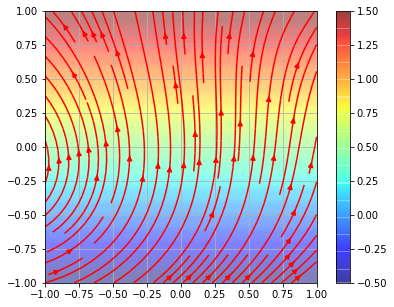

In [4]:
# formalna substitucia premennych, x,y - nie su premenne v sympy, ale retazce
Fx = F.components[r.i].subs([(r.x, 'x'), (r.y, 'y')])                 
Fy = F.components[r.j].subs([(r.x, 'x'), (r.y, 'y')]) 
Ds = D.subs([(r.x, 'x'), (r.y, 'y')])   

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dx = np.linspace(-1.0, 1.0, 20)    # rozsahy suradnic
dy = np.linspace(-1.0, 1.0, 20)
x, y = np.meshgrid(dx, dy) 

a = eval(str(Fx))                  # numericky vypocet zloziek
b = eval(str(Fy))                  # vyhodnotenie retazcov - konverzia zo sympy
d = eval(str(Ds))

fig = plt.figure(figsize=(7, 5)) 
ax = fig.add_subplot(111)
ax.streamplot(x, y, a, b, color='r')
img = ax.imshow(d, extent=[-1, 1, -1, 1], origin='lower', interpolation='kaiser', 
                 clip_on=True, alpha=0.5, cmap='jet') 
fig.colorbar(img)
plt.grid() 
plt.show()

## Numerický výpočet


Pomocou knižnice *numdiftools* určime divergenciu vektorového poľa $\mathbf{F}(x,y)$ z predchádzajúceho príkladu
v bode roviny $P(x,y) = (-0.5, 0.5)$. Jacobiho maticu pre 2-rozmerný prípad má tvar

\begin{equation*}
\mathbf J 
= \begin{bmatrix}
    \dfrac{\partial F_x}{\partial x} &  \dfrac{\partial F_x}{\partial y}\\
    \dfrac{\partial F_y}{\partial x} &  \dfrac{\partial F_y}{\partial y} \end{bmatrix}
\end{equation*}

In [5]:
%reset -f 
import numdifftools as nd
import numpy as np

def F(p):
    [x,y] = p
    return np.array([ (-y*(1 - x - y**2) + x/4),  (2 - x**2 + y/4) ])

P = [-0.5, 0.5]
J = nd.Jacobian(F)
value = J(P)
print(value)

[[ 0.75 -1.75]
 [ 3.    0.25]]


Hodnotu divergencie určíme priamo pomocou prvkov matice Jacobiánu

\begin{equation*}
\mathrm{div} \, \mathbf{F} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} 
\end{equation*}

In [6]:
div = value[0,0] + value[1,1]
print(div)

1.0000000000000002
